In [1]:
# Importation des librairies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from matplotlib.collections import LineCollection
import seaborn as sns
from tabulate import tabulate
from sklearn import preprocessing, cluster, metrics, decomposition
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from functions import *
from sklearn import preprocessing, cluster, metrics, decomposition
from sklearn.metrics import silhouette_score
# Options d'affichage.
plt.style.use(
    "https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

# round to 2 decimal places in python pandas
pd.options.display.float_format = '{:,.2f}'.format

# prevent scientific notation
np.set_printoptions(suppress=True)

# 1. Importation et Pré-traitement des donnees

In [2]:
# Importation des fichiers.
population = pd.read_csv("csv\Population_2000_2018.csv")
dispo = pd.read_csv("csv\DisponibiliteAlimentaire_2017.csv")
pib = pd.read_csv("csv\pib-habitant.csv")
production = pd.read_csv("csv\production-viande-par-type.csv")
stabilite = pd.read_csv("csv\landportal-WB-PV.EST.csv", sep=";")
distance = pd.read_csv("csv\distances_france.csv")
pays_iso = pd.read_csv("csv\iso3_pays_fr_en.csv", sep=";", encoding="1252")


# Création d'une copie dans un dataframe.
df_population = population.copy()
df_dispo = dispo.copy()
df_pib = pib.copy()
df_production = production.copy()
df_stabilite = stabilite.copy()
df_distance = distance.copy()
df_pays_iso = pays_iso.copy()


****

## 1.1 Population

In [3]:
# Affichage des premières lignes et observation de la forme du dataframe.
print(df_population.shape)
df_population.head()

(4411, 15)


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,"20,779.95",X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,"21,606.99",X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,"22,600.77",X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,"23,680.87",X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,"24,726.68",X,Sources internationales sûres,NaN


In [4]:
# Affichage de statistiques descriptives sur le dataframe.
df_population.describe(include="all")

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,4411,4411,"4,411.00",4411,"4,411.00",4411,"4,411.00",4411,"4,411.00","4,411.00",4411,"4,411.00",4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Afghanistan,NaN,Population totale,NaN,Population-Estimations,NaN,NaN,1000 personnes,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,NaN,4411,NaN,4374,4374,258
mean,NaN,NaN,132.20,NaN,511.00,NaN,"3,010.00",NaN,"2,009.07","2,009.07",NaN,"29,630.04",NaN,NaN,NaN
std,NaN,NaN,75.85,NaN,0.00,NaN,0.00,NaN,5.48,5.48,NaN,"123,802.86",NaN,NaN,NaN
min,NaN,NaN,1.00,NaN,511.00,NaN,"3,010.00",NaN,"2,000.00","2,000.00",NaN,0.79,NaN,NaN,NaN
25%,NaN,NaN,68.00,NaN,511.00,NaN,"3,010.00",NaN,"2,004.00","2,004.00",NaN,392.19,NaN,NaN,NaN
50%,NaN,NaN,132.00,NaN,511.00,NaN,"3,010.00",NaN,"2,009.00","2,009.00",NaN,"4,764.74",NaN,NaN,NaN
75%,NaN,NaN,195.00,NaN,511.00,NaN,"3,010.00",NaN,"2,014.00","2,014.00",NaN,"18,215.48",NaN,NaN,NaN


In [5]:
# Sélection des colonnes à conserver.
df_population = df_population[["Zone", "Année", "Valeur"]]
df_population.sample(5)

,Zone,Année,Valeur
1317,France,2009,"62,542.90"
1453,Grenade,2012,107.45
883,Comores,2001,555.89
3853,Slovaquie,2000,"5,399.21"
4193,Tunisie,2010,"10,635.24"


In [6]:
# Ajout d'une colonne "evolution_pop" qui contient la variation de la population entre 2012 et 2017.
df_population["evolution_pop"] = df_population.groupby("Zone")["Valeur"].pct_change(periods=5)

In [7]:
# Conversion en milions d'habitants.
df_population["Valeur"] = df_population["Valeur"] * 1000

# Conversion en pourcentage.
df_population["evolution_pop"] = df_population["evolution_pop"] * 100

# Conservation données de 2017.
df_population = df_population.query("Année == 2017").copy() 

In [8]:
# Renommage des colonnes.
df_population.rename(columns={"Zone": "pays", "Valeur": "population",}, inplace=True)

# Suppression de la colonne "Année".
df_population.drop(columns=["Année"], inplace=True)

In [9]:
df_population = pd.merge(df_population, df_pays_iso, on="pays", how="inner", ) 

In [10]:
# Vérification des types de données et de la présence de valeurs NaN.
df_population.info()
df_population.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pays           223 non-null    object 
 1   population     223 non-null    float64
 2   evolution_pop  223 non-null    float64
 3   iso_a3         223 non-null    object 
 4   pays_en        223 non-null    object 
dtypes: float64(2), object(3)
memory usage: 8.8+ KB


pays             0
population       0
evolution_pop    0
iso_a3           0
pays_en          0
dtype: int64

In [11]:
# Recherche de lignes entièrement dupliquées.
df_population.duplicated().sum()

0

In [12]:
# Recherche de lignes dupliquées sur la colonne "pays".
df_population.duplicated(subset=["pays"]).sum()

0

In [13]:
df_population

,pays,population,evolution_pop,iso_a3,pays_en
0,Afghanistan,"36,296,113.00",16.48,AFG,Afghanistan
1,Afrique du Sud,"57,009,756.00",7.91,ZAF,South Africa
2,Albanie,"2,884,169.00",-1.03,ALB,Albania
3,Algérie,"41,389,189.00",10.71,DZA,Algeria
4,Allemagne,"82,658,409.00",2.08,DEU,Germany
...,...,...,...,...,...
218,Venezuela (République bolivarienne du),"29,402,484.00",0.14,VEN,Venezuela
219,Viet Nam,"94,600,648.00",5.34,VNM,Vietnam
220,Yémen,"27,834,819.00",13.74,YEM,Yemen
221,Zambie,"16,853,599.00",16.51,ZMB,Zambia


****

## 1.2 Dispobilite alimentaire

In [14]:
# Affichage des premières lignes et observation de la forme du dataframe.
print(df_dispo.shape)
df_dispo.sample(3)

(176600, 14)


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
8097,FBS,Nouveaux Bilans Alimentaire,194,Arabie saoudite,5611,Importations - Quantité,2848,Lait - Excl Beurre,2017,2017,Milliers de tonnes,503.00,S,Données standardisées
64656,FBS,Nouveaux Bilans Alimentaire,81,Ghana,5072,Variation de stock,2513,Orge et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
65765,FBS,Nouveaux Bilans Alimentaire,84,Grèce,5301,Disponibilité intérieure,2515,Seigle et produits,2017,2017,Milliers de tonnes,29.00,S,Données standardisées


In [15]:
# Sélection des colonnes à conserver.
df_dispo = df_dispo[["Zone","Élément", "Produit","Unité", "Valeur"]]

In [16]:
# Affichage des valeurs unique de la colonne "Element".
df_dispo["Élément"].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [17]:
# Concaténation des colonnes "Element" et "Produit" pour créer une nouvelle colonne "Produit".
df_dispo["Produit"] = df_dispo["Élément"] + " - " + df_dispo["Produit"]

In [18]:
# Filtrage du dataframe sur les produits 'Viande de Volailles'.
df_dispo = df_dispo[df_dispo["Produit"].str.contains("Volailles")].copy()

In [19]:
df_dispo.drop(columns=["Élément"], inplace=True)

In [20]:
df_dispo = df_dispo.pivot_table(index=["Zone"], columns="Produit", values="Valeur", aggfunc="sum")
df_dispo = df_dispo.reset_index()
df_dispo.columns.name = None

df_dispo

,Zone,Alimentation pour touristes - Viande de Volailles,Aliments pour animaux - Viande de Volailles,Autres utilisations (non alimentaire) - Viande de Volailles,Disponibilité alimentaire (Kcal/personne/jour) - Viande de Volailles,Disponibilité alimentaire en quantité (kg/personne/an) - Viande de Volailles,Disponibilité de matière grasse en quantité (g/personne/jour) - Viande de Volailles,Disponibilité de protéines en quantité (g/personne/jour) - Viande de Volailles,Disponibilité intérieure - Viande de Volailles,Exportations - Quantité - Viande de Volailles,Importations - Quantité - Viande de Volailles,Nourriture - Viande de Volailles,Pertes - Viande de Volailles,Production - Viande de Volailles,Résidus - Viande de Volailles,Semences - Viande de Volailles,Traitement - Viande de Volailles,Variation de stock - Viande de Volailles
0,Afghanistan,NaN,NaN,NaN,5.00,1.53,0.33,0.54,57.00,NaN,29.00,55.00,2.00,28.00,0.00,NaN,NaN,0.00
1,Afrique du Sud,0.00,NaN,NaN,143.00,35.69,9.25,14.11,"2,118.00",63.00,514.00,"2,035.00",83.00,"1,667.00",0.00,NaN,NaN,0.00
2,Albanie,NaN,NaN,NaN,85.00,16.36,6.45,6.26,47.00,0.00,38.00,47.00,NaN,13.00,0.00,NaN,NaN,4.00
3,Algérie,0.00,NaN,NaN,22.00,6.38,1.50,1.97,277.00,0.00,2.00,264.00,13.00,275.00,0.00,NaN,NaN,0.00
4,Allemagne,NaN,NaN,NaN,71.00,19.47,4.16,7.96,"1,739.00",646.00,842.00,"1,609.00",NaN,"1,514.00",-38.00,NaN,167.00,-29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,NaN,NaN,NaN,147.00,43.47,9.25,14.80,412.00,94.00,433.00,412.00,NaN,48.00,0.00,NaN,NaN,-26.00
168,Équateur,0.00,NaN,NaN,83.00,19.31,6.35,6.15,341.00,0.00,0.00,324.00,17.00,340.00,0.00,NaN,NaN,-1.00
169,États-Unis d'Amérique,NaN,NaN,89.00,219.00,55.68,14.83,19.93,"18,266.00","3,692.00",123.00,"18,100.00",NaN,"21,914.00",0.00,NaN,77.00,80.00
170,Éthiopie,0.00,NaN,NaN,0.00,0.13,0.03,0.04,14.00,NaN,1.00,14.00,1.00,14.00,0.00,NaN,NaN,0.00


In [21]:
# # pivot de Produit en colonnes
# df_dispo = df_dispo.pivot_table(index=["Zone"], columns="Produit", values="Valeur", aggfunc="sum")
# df_dispo

In [22]:
# Vérification des valeurs NaN.
df_dispo.isna().sum()

Zone                                                                                     0
Alimentation pour touristes - Viande de Volailles                                       94
Aliments pour animaux - Viande de Volailles                                            171
Autres utilisations (non alimentaire) - Viande de Volailles                            138
Disponibilité alimentaire (Kcal/personne/jour) - Viande de Volailles                     0
Disponibilité alimentaire en quantité (kg/personne/an) - Viande de Volailles             0
Disponibilité de matière grasse en quantité (g/personne/jour) - Viande de Volailles      0
Disponibilité de protéines en quantité (g/personne/jour) - Viande de Volailles           0
Disponibilité intérieure - Viande de Volailles                                           2
Exportations - Quantité - Viande de Volailles                                           37
Importations - Quantité - Viande de Volailles                                            2

In [23]:
# Suppression des colonnes inutiles
df_dispo.drop(columns=["Alimentation pour touristes - Viande de Volailles",
                        "Aliments pour animaux - Viande de Volailles",
                        "Autres utilisations (non alimentaire) - Viande de Volailles",
                        "Disponibilité alimentaire (Kcal/personne/jour) - Viande de Volailles",
                        "Disponibilité alimentaire en quantité (kg/personne/an) - Viande de Volailles",
                        "Disponibilité de matière grasse en quantité (g/personne/jour) - Viande de Volailles",
                        "Disponibilité de protéines en quantité (g/personne/jour) - Viande de Volailles",
                        "Pertes - Viande de Volailles",
                        "Résidus - Viande de Volailles",
                        "Semences - Viande de Volailles",
                        "Traitement - Viande de Volailles",],
                inplace=True)

In [24]:
df_dispo.isna().sum()   

Zone                                               0
Disponibilité intérieure - Viande de Volailles     2
Exportations - Quantité - Viande de Volailles     37
Importations - Quantité - Viande de Volailles      2
Nourriture - Viande de Volailles                   2
Production - Viande de Volailles                   4
Variation de stock - Viande de Volailles           3
dtype: int64

In [25]:
df_dispo[df_dispo["Disponibilité intérieure - Viande de Volailles"].isnull()]

,Zone,Disponibilité intérieure - Viande de Volailles,Exportations - Quantité - Viande de Volailles,Importations - Quantité - Viande de Volailles,Nourriture - Viande de Volailles,Production - Viande de Volailles,Variation de stock - Viande de Volailles
113,Ouzbékistan,NaN,NaN,NaN,NaN,NaN,NaN
130,République démocratique populaire lao,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_dispo[df_dispo["Importations - Quantité - Viande de Volailles"].isnull()]

,Zone,Disponibilité intérieure - Viande de Volailles,Exportations - Quantité - Viande de Volailles,Importations - Quantité - Viande de Volailles,Nourriture - Viande de Volailles,Production - Viande de Volailles,Variation de stock - Viande de Volailles
113,Ouzbékistan,NaN,NaN,NaN,NaN,NaN,NaN
130,République démocratique populaire lao,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_dispo[df_dispo["Production - Viande de Volailles"].isnull()]

,Zone,Disponibilité intérieure - Viande de Volailles,Exportations - Quantité - Viande de Volailles,Importations - Quantité - Viande de Volailles,Nourriture - Viande de Volailles,Production - Viande de Volailles,Variation de stock - Viande de Volailles
43,Djibouti,3.00,NaN,3.00,3.00,NaN,0.00
92,Maldives,12.00,NaN,12.00,7.00,NaN,0.00
113,Ouzbékistan,NaN,NaN,NaN,NaN,NaN,NaN
130,République démocratique populaire lao,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Suppression des lignes contenant des valeurs NaN pour la colonne ""Production - Viande de Volailles".
df_dispo.dropna(subset=["Production - Viande de Volailles"], inplace=True)

In [29]:
# Vérification des lignes pour lesquelles la valeur de la colonne "Exportations - Quantité - Viande de Volailles" est NaN.
df_dispo[df_dispo["Exportations - Quantité - Viande de Volailles"].isnull()]

,Zone,Disponibilité intérieure - Viande de Volailles,Exportations - Quantité - Viande de Volailles,Importations - Quantité - Viande de Volailles,Nourriture - Viande de Volailles,Production - Viande de Volailles,Variation de stock - Viande de Volailles
0,Afghanistan,57.00,NaN,29.00,55.00,28.00,0.00
13,Bahamas,26.00,NaN,24.00,16.00,6.00,4.00
14,Bangladesh,250.00,NaN,0.00,240.00,249.00,0.00
23,Burkina Faso,46.00,NaN,0.00,44.00,46.00,0.00
26,Cabo Verde,10.00,NaN,12.00,9.00,1.00,4.00
27,Cambodge,38.00,NaN,10.00,37.00,28.00,0.00
40,Cuba,342.00,NaN,312.00,269.00,29.00,-1.00
54,Gambie,8.00,NaN,16.00,8.00,2.00,10.00
56,Grenade,8.00,NaN,7.00,5.00,1.00,0.00
59,Guinée,50.00,NaN,37.00,49.00,13.00,0.00


La disponibilité intérieure est calculée par la FAO selon la formule suivante :<br><center>Disponibilité intérieure = Production + Importations – Exportations - Variation de stock</center>


Nous povons calculer les valeurs nulles de la colonne exportation selon la formule suivante :<br><center>Exportations = Production + Importations - Disponibilité intérieure - Variation de stock</center>

In [30]:
# Définition d'une fonction pour calculer les valeurs d'exportation.
def calculer_exportations(ligne):
    # Si la valeur d'exportation est NaN
    if np.isnan(ligne['Exportations - Quantité - Viande de Volailles']):
        return ligne['Production - Viande de Volailles'] + ligne['Importations - Quantité - Viande de Volailles'] -\
               ligne['Disponibilité intérieure - Viande de Volailles'] - ligne['Variation de stock - Viande de Volailles']
    # Sinon, retourner la valeur d'exportation existante
    else:
        return ligne['Exportations - Quantité - Viande de Volailles']

# Application la fonction à chaque ligne du DataFrame
df_dispo['Exportations - Quantité - Viande de Volailles'] = df_dispo.apply(calculer_exportations, axis=1)

Le Taux de dépendance des importations (TDI), tel que défini par la FAO, est une mesure utilisée pour comprendre dans quelle mesure une nation dépend de l'importation de nourriture par rapport à sa propre production. Il est calculé en utilisant la formule suivante :

TDI = \(\frac{Importations}{Disponibilité intérieure} \) x 100

In [31]:
# Ajout d'une colonne Taux de dépendance des importations (TDI)
df_dispo["TDI"] = df_dispo["Importations - Quantité - Viande de Volailles"] / df_dispo["Disponibilité intérieure - Viande de Volailles"] * 100

Le Taux d'Autosuffisance (TAS) exprime l'ampleur de la production par rapport à l'utilisation domestique. Il est défini comme suit:

TAS=Production/Disponibilité intérieure​×100

In [32]:
# Ajout d'une colonne TAS
df_dispo["TAS"] = df_dispo["Production - Viande de Volailles"] / df_dispo["Disponibilité intérieure - Viande de Volailles"] * 100

In [33]:

# Renommage des colonnes
df_dispo.rename(columns={"Zone": "pays",
                         "Disponibilité intérieure - Viande de Volailles": "dispo_inter",
                         "Production - Viande de Volailles": "production",
                         "Importations - Quantité - Viande de Volailles": "importation",
                         "Exportations - Quantité - Viande de Volailles": "exportation",
                         "Nourriture - Viande de Volailles": "nourriture",},
                inplace=True)

In [34]:
df_dispo.drop(columns=[ "Variation de stock - Viande de Volailles"], inplace=True)


In [35]:
# Suppression des colonnes inutiles et réarrangement des colonnes
df_dispo = df_dispo[["pays", "TDI", "TAS",
                     "dispo_inter",
                     "importation",
                     "exportation",
                     "nourriture",]]

In [36]:
df_dispo = pd.merge(df_dispo, df_pays_iso, on="pays", how="inner",)


In [37]:
# Vérification des types de données et de la présence de valeurs NaN.
df_dispo.info()
df_dispo.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pays         165 non-null    object 
 1   TDI          165 non-null    float64
 2   TAS          165 non-null    float64
 3   dispo_inter  165 non-null    float64
 4   importation  165 non-null    float64
 5   exportation  165 non-null    float64
 6   nourriture   165 non-null    float64
 7   iso_a3       165 non-null    object 
 8   pays_en      165 non-null    object 
dtypes: float64(6), object(3)
memory usage: 11.7+ KB


pays           0
TDI            0
TAS            0
dispo_inter    0
importation    0
exportation    0
nourriture     0
iso_a3         0
pays_en        0
dtype: int64

In [38]:
# Remplacement des valeurs négatives par des zeros dans la colonne "exportation".
df_dispo["exportation"] = df_dispo["exportation"].apply(lambda x: 0 if x < 0 else x)

In [39]:
# Recherche de lignes entièrement dupliquées. 
df_dispo.duplicated().sum()

0

In [40]:
# Recherche de lignes dupliquées sur la colonne "pays".
df_dispo.duplicated(subset=["pays"]).sum()

0

In [41]:
df_dispo

,pays,TDI,TAS,dispo_inter,importation,exportation,nourriture,iso_a3,pays_en
0,Afghanistan,50.88,49.12,57.00,29.00,0.00,55.00,AFG,Afghanistan
1,Afrique du Sud,24.27,78.71,"2,118.00",514.00,63.00,"2,035.00",ZAF,South Africa
2,Albanie,80.85,27.66,47.00,38.00,0.00,47.00,ALB,Albania
3,Algérie,0.72,99.28,277.00,2.00,0.00,264.00,DZA,Algeria
4,Allemagne,48.42,87.06,"1,739.00",842.00,646.00,"1,609.00",DEU,Germany
...,...,...,...,...,...,...,...,...,...
160,Émirats arabes unis,105.10,11.65,412.00,433.00,94.00,412.00,ARE,United Arab Emirates
161,Équateur,0.00,99.71,341.00,0.00,0.00,324.00,ECU,Ecuador
162,États-Unis d'Amérique,0.67,119.97,"18,266.00",123.00,"3,692.00","18,100.00",USA,United States
163,Éthiopie,7.14,100.00,14.00,1.00,1.00,14.00,ETH,Ethiopia


***

## 1.3 PIB

In [42]:
print(df_pib.shape)
df_pib.sample(2)    

(19068, 5)


,Entity,Code,Year,GDP per capita,417485-annotations
12940,Poland,POL,1646,897.00,NaN
2930,Colombia,COL,1983,"6,655.00",NaN


In [43]:
df_pib.rename(columns={"Entity": "pays", "Code": "iso_a3", "Year": "annee", "GDP per capita": "pib_hab"}, inplace=True)

In [44]:
df_pib.drop(columns=['417485-annotations',], inplace=True)

In [45]:
# Ajout d'une colonne "evolution_pib" qui contient la variation du PIB/habitant entre 2012 et 2017.
df_pib["evolution_pib"] = df_pib.groupby("pays")["pib_hab"].pct_change(periods=5) *100

In [46]:
df_pib = df_pib[df_pib["annee"] == 2017].copy()
df_pib.drop(columns=['annee'], inplace=True)

In [47]:
# Homogénéisation des noms de pays
df_pib = pd.merge(df_pib, df_pays_iso, on="iso_a3",how="inner")

In [48]:
# Suppression des colonnes inutiles et réarrangement des colonnes
df_pib = df_pib[["pays_y", "iso_a3", "pays_en", "pib_hab", "evolution_pib"]].copy()
df_pib.rename(columns={"pays_y": "pays"}, inplace=True)

In [49]:
# Vérification des types de données et de la présence de valeurs NaN.
df_pib.info()
df_pib.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pays           159 non-null    object 
 1   iso_a3         159 non-null    object 
 2   pays_en        159 non-null    object 
 3   pib_hab        159 non-null    float64
 4   evolution_pib  159 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.3+ KB


pays             0
iso_a3           0
pays_en          0
pib_hab          0
evolution_pib    0
dtype: int64

In [50]:
# Recherche de lignes entièrement dupliquées.
df_pib.duplicated().sum()

0

In [51]:
# Recherche de lignes dupliquées sur la colonne "pays".
df_pib.duplicated(subset=["pays"]).sum()

0

In [52]:
df_pib

,pays,iso_a3,pays_en,pib_hab,evolution_pib
0,Afghanistan,AFG,Afghanistan,"2,014.75",3.59
1,Albanie,ALB,Albania,"10,702.12",11.57
2,Algérie,DZA,Algeria,"14,267.23",6.64
3,Angola,AGO,Angola,"8,146.44",-0.53
4,Argentine,ARG,Argentina,"19,200.91",-2.03
...,...,...,...,...,...
154,Venezuela (République bolivarienne du),VEN,Venezuela,"12,879.14",-30.57
155,Viet Nam,VNM,Vietnam,"6,422.09",28.85
156,Yémen,YEM,Yemen,"2,321.92",-43.05
157,Zambie,ZMB,Zambia,"3,497.58",4.41


***

## 1.4 Production

In [53]:
print(df_production.shape)
df_production.head(3)

(11059, 10)


,Entity,Code,Year,"Meat, game | 00001163 || Production | 005510 || tonnes","Meat, horse | 00001097 || Production | 005510 || tonnes","Meat, camel | 00001127 || Production | 005510 || tonnes","Meat, sheep and goat | 00001807 || Production | 005510 || tonnes","Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes","Meat, pig | 00001035 || Production | 005510 || tonnes","Meat, poultry | 00001808 || Production | 005510 || tonnes"
0,Afghanistan,AFG,1961,"4,000.00",NaN,"3,600.00","73,220.00","43,000.00",NaN,"5,600.00"
1,Afghanistan,AFG,1962,"4,000.00",NaN,"4,030.74","72,375.00","45,800.00",NaN,"6,000.00"
2,Afghanistan,AFG,1963,"5,000.00",NaN,"5,031.36","75,530.00","47,250.00",NaN,"6,160.00"


In [54]:
df_production.rename(columns={"Entity": "pays", "Code": "iso_a3", "Year": "annee",
                                  "Meat, game | 00001163 || Production | 005510 || tonnes": "production_gibier_tonnes",
                                  "Meat, horse | 00001097 || Production | 005510 || tonnes": "production_cheval_tonnes",
                                  "Meat, camel | 00001127 || Production | 005510 || tonnes": "production_camel_tonnes",
                                  "Meat, sheep and goat | 00001807 || Production | 005510 || tonnes": "production_ovins_tonnes",
                                  "Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes": "production_bovins_tonnes",
                                  "Meat, pig | 00001035 || Production | 005510 || tonnes": "production_porcs_tonnes",
                                  "Meat, poultry | 00001808 || Production | 005510 || tonnes": "production_volailles_tonnes"},
                         inplace=True)

In [55]:
df_production.fillna(0, inplace=True)

In [56]:
# Ajout d'une colonne pour la somme des viandes.
df_production["production_viande_tonnes"] = df_production["production_gibier_tonnes"] + df_production["production_cheval_tonnes"] + df_production["production_camel_tonnes"] + df_production["production_ovins_tonnes"] + df_production["production_bovins_tonnes"] + df_production["production_porcs_tonnes"] + df_production["production_volailles_tonnes"]

In [57]:
# ajout d'une colonne pour le pourcentage de viande de volaille.
df_production["pct_viande_volaille"] = df_production["production_volailles_tonnes"] / df_production["production_viande_tonnes"] * 100

In [58]:
# Suppression des colonnes inutiles.
df_production.drop(columns=['production_viande_tonnes','production_gibier_tonnes', 'production_cheval_tonnes', 'production_camel_tonnes', 'production_ovins_tonnes', 'production_bovins_tonnes', 'production_porcs_tonnes'], inplace=True)

In [59]:
# Ajout d'une colonne "evolution_prod" qui contient la variation de la production de volailles entre 2012 et 2017.
df_production["evolution_prod"] = df_production.groupby("pays")["production_volailles_tonnes"].pct_change(periods=5) *100

In [60]:
df_production = df_production[df_production["annee"] == 2017].copy()
df_production.drop(columns=['annee'], inplace=True)

In [61]:
df_production.shape

(191, 5)

In [62]:
df_production.rename(columns={"production_volailles_tonnes": "production",
                              "pct_viande_volaille": "part_production",
                              "evolution_prod" : "evolution_production"}, inplace=True)


In [63]:
df_production[df_production["evolution_production"].isna()]

,pays,iso_a3,production,part_production,evolution_production
1131,Bosnia and Herzegovina,BIH,"61,040.00",70.44,NaN
2736,Djibouti,DJI,0.00,0.00,NaN
3278,Faroe Islands,FRO,0.00,0.00,NaN


In [64]:
df_production.fillna(0, inplace=True)   

In [65]:
df_production = pd.merge(df_production, df_pays_iso, on="iso_a3", how="inner")


In [66]:
# Vérification des types de données et de la présence de valeurs NaN.
df_production.info()
df_production.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pays_x                188 non-null    object 
 1   iso_a3                188 non-null    object 
 2   production            188 non-null    float64
 3   part_production       188 non-null    float64
 4   evolution_production  188 non-null    float64
 5   pays_y                188 non-null    object 
 6   pays_en               188 non-null    object 
dtypes: float64(3), object(4)
memory usage: 10.4+ KB


pays_x                  0
iso_a3                  0
production              0
part_production         0
evolution_production    0
pays_y                  0
pays_en                 0
dtype: int64

In [67]:
# Recherche de lignes entièrement dupliquées.
df_production.duplicated().sum()

0

In [68]:
# Recherche de lignes dupliquées sur la colonne "pays".
df_production.duplicated(subset=["pays_x"]).sum()

0

In [69]:
# Conservation des colonnes utiles.
df_production = df_production[["pays_y", "iso_a3", "pays_en", "production", "part_production", "evolution_production"]].copy()

# Renommage des colonnes.
df_production.rename(columns={"pays_y": "pays"}, inplace=True)

In [70]:
df_production

,pays,iso_a3,pays_en,production,part_production,evolution_production
0,Afghanistan,AFG,Afghanistan,"27,637.84",8.82,11.44
1,Albanie,ALB,Albania,"14,414.11",15.80,-9.91
2,Algérie,DZA,Algeria,"260,460.86",33.52,-0.77
3,Angola,AGO,Angola,"40,460.72",13.18,57.74
4,Antigua-et-Barbuda,ATG,Antigua and Barbuda,23.48,8.90,-70.80
...,...,...,...,...,...,...
183,Venezuela (République bolivarienne du),VEN,Venezuela,"462,413.00",44.47,-53.00
184,Viet Nam,VNM,Vietnam,"910,151.75",23.14,45.30
185,Yémen,YEM,Yemen,"168,628.27",47.93,7.87
186,Zambie,ZMB,Zambia,"47,420.58",13.95,7.77


****

## 1.5 Stabilité politique

In [71]:
print(df_stabilite.shape)
df_stabilite.head(3)

(4020, 6)


,Indicator name,indicator,Country name,country,time,value
0,Political stability and absence of violence/te...,WB-PV.EST,Iraq,IRQ,1996,-1.82
1,Political stability and absence of violence/te...,WB-PV.EST,Nicaragua,NIC,1996,-0.52
2,Political stability and absence of violence/te...,WB-PV.EST,Nigeria,NGA,1996,-1.06


In [72]:
# Conservation des lignes pour l'année 2017.
df_stabilite = df_stabilite[df_stabilite["time"] == 2017].copy()

In [73]:
# Suppression des colonnes inutiles.
df_stabilite.drop(columns=['Indicator name', 'indicator', 'time'], inplace=True)

In [74]:
# Renommage des colonnes.
df_stabilite.rename(columns={"Country name": "pays", "country": "iso_a3", "value": "stabilite"}, inplace=True)

In [75]:
# Vérification des types de données et de la présence de valeurs NaN.
df_stabilite.info()
df_stabilite.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 3608 to 3813
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pays       206 non-null    object 
 1   iso_a3     206 non-null    object 
 2   stabilite  206 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


pays         0
iso_a3       0
stabilite    0
dtype: int64

In [76]:
# Recherche de lignes entièrement dupliquées.
df_stabilite.duplicated().sum() 

0

In [77]:
# Recherche de lignes dupliquées sur la colonne "pays".
df_stabilite.duplicated(subset=["pays"]).sum()

0

In [78]:
df_stabilite

,pays,iso_a3,stabilite
3608,Colombia,COL,-0.77
3609,Kiribati,KIR,0.88
3610,Switzerland,CHE,1.26
3611,Antigua and Barbuda,ATG,0.75
3612,Canada,CAN,1.10
...,...,...,...
3809,Bermuda,BMU,1.00
3810,American Samoa,ASM,1.22
3811,Marshall Islands,MHL,0.87
3812,Luxembourg,LUX,1.33


*****

## 1.6 Distance à la France

In [79]:
print(df_distance.shape)
df_distance.head()

(242, 2)


,pays,distance
0,Canada,"6,840.80"
1,Guinea-Bissau,"4,163.96"
2,Saint Helena,"7,921.79"
3,Lithuania,"1,809.68"
4,Cambodia,"9,958.07"


In [80]:
# Merge avec la table des pays pour récupérer le code ISO 3.
df_distance = pd.merge(df_distance, df_pays_iso, left_on="pays", right_on="pays_en", how="inner")

In [81]:
# Vérification des types de données et de la présence de valeurs NaN.
df_distance.info()
df_distance.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pays_x    224 non-null    object 
 1   distance  224 non-null    float64
 2   iso_a3    224 non-null    object 
 3   pays_y    224 non-null    object 
 4   pays_en   224 non-null    object 
dtypes: float64(1), object(4)
memory usage: 8.9+ KB


pays_x      0
distance    0
iso_a3      0
pays_y      0
pays_en     0
dtype: int64

In [82]:
# Recherche de lignes entièrement dupliquées.   
df_distance.duplicated().sum()

0

In [83]:
df_distance = df_distance[["pays_y", "iso_a3", "pays_en", "distance"]].copy()
df_distance.rename(columns={"pays_y": "pays"}, inplace=True)

In [84]:
# Recherche de lignes dupliquées sur la colonne "pays".
df_distance.duplicated(subset=["pays"]).sum()

0

In [85]:
df_distance

,pays,iso_a3,pays_en,distance
0,Canada,CAN,Canada,"6,840.80"
1,Guinée-Bissau,GNB,Guinea-Bissau,"4,163.96"
2,"Sainte-Hélène, Ascension et Tristan da Cunha",SHN,Saint Helena,"7,921.79"
3,Lituanie,LTU,Lithuania,"1,809.68"
4,Cambodge,KHM,Cambodia,"9,958.07"
...,...,...,...,...
219,Île Christmas,CXR,Christmas Island,"11,878.67"
220,Grèce,GRC,Greece,"1,783.68"
221,Sri Lanka,LKA,Sri Lanka,"8,497.19"
222,Gabon,GAB,Gabon,"5,309.97"


****

# 2. Jointures

In [86]:
# Jointure de "df_population" et "df_production"".
df_temp1 = pd.merge(df_population, df_production, on=["iso_a3", "pays", "pays_en"], how="inner")
df_temp1.shape

(186, 8)

In [87]:
# Jointure de "df_temp1" et "df_dispo".
df_temp2 = pd.merge(df_temp1, df_dispo, on=["iso_a3", "pays", "pays_en"], how="inner", )
df_temp2.shape

(160, 14)

In [88]:
# Jointure de "df_temp2" et "df_stabilite".
df_temp3 = pd.merge(df_temp2, df_stabilite, on=[ "iso_a3"], how="inner")
df_temp3.drop(columns=[ 'pays_y'], inplace=True)
df_temp3.rename(columns={"pays_x": "pays"}, inplace=True)
df_temp3.shape

(158, 15)

In [89]:
# Jointure de "df_temp3" et "df_pib". 
df_temp4 = pd.merge(df_temp3, df_pib, on=["iso_a3",  "pays", "pays_en"], how="inner") 
df_temp4.shape

(144, 17)

In [90]:
# Jointure de "df_temp4" et "df_distance".
df_final = pd.merge(df_temp4, df_distance, on=["iso_a3", "pays", "pays_en"], how="inner")
df_final.shape

(141, 18)

****

# 3. Analyse exploratoire et Feature selection

In [91]:
# Mettre pays en index
df_final.set_index("pays", inplace=True)


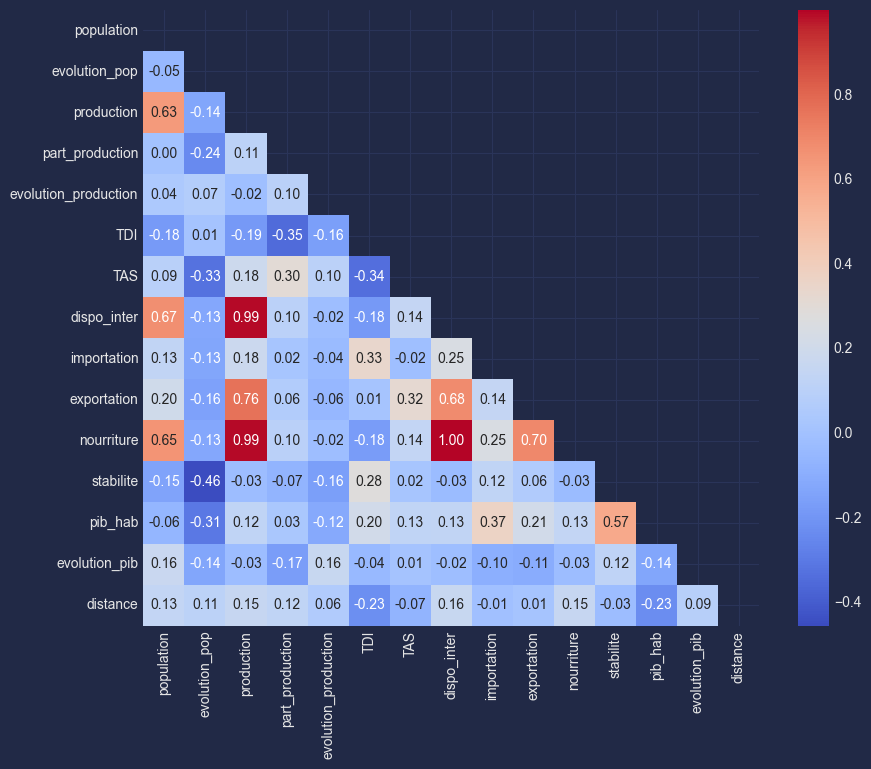

In [92]:
# Sélectionner uniquement les colonnes numériques
df_final_num = df_final.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
corr = df_final_num.corr()

# Créer un masque pour la partie supérieure de la matrice
mask = np.triu(np.ones_like(corr, dtype=bool))

# Créer une heatmap avec seaborn
plt.figure(figsize=(10, 8))  # Définir la taille de la figure
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, cbar=True, square=True)

# Afficher la heatmap
plt.show()


In [93]:
# Supprimer disponibilité intérieure
df_final.drop(columns=["dispo_inter"], inplace=True)

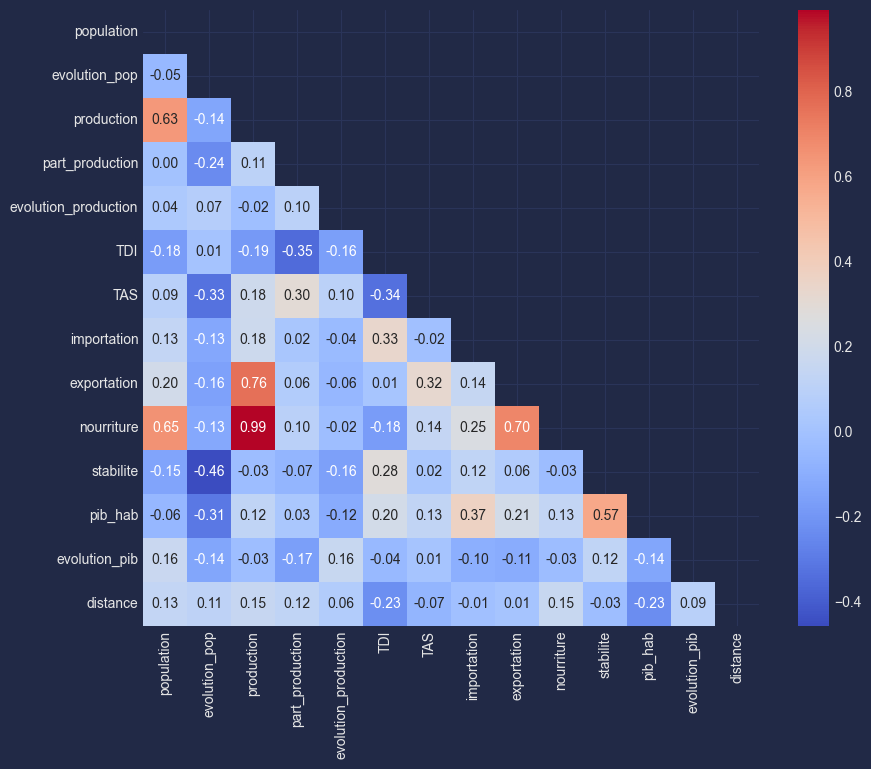

In [94]:
# Sélectionner uniquement les colonnes numériques
df_final_num = df_final.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
corr = df_final_num.corr()

# Créer un masque pour la partie supérieure de la matrice
mask = np.triu(np.ones_like(corr, dtype=bool))

# Créer une heatmap avec seaborn
plt.figure(figsize=(10, 8))  # Définir la taille de la figure
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, cbar=True, square=True)

# Afficher la heatmap
plt.show()



Analyse univariée pour la variable 'population':
╒════════════╤═════════╤═════════════╤═════════════╤═══════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════╤════════════╕
│            │   count │        mean │         std │   min │         25% │         50% │         75% │         max │    skew │   kurtosis │
╞════════════╪═════════╪═════════════╪═════════════╪═══════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════╪════════════╡
│ population │     141 │ 5.10681e+07 │ 1.67939e+08 │ 71458 │ 4.94995e+06 │ 1.14334e+07 │ 3.62961e+07 │ 1.42102e+09 │ 7.25471 │    55.8061 │
╘════════════╧═════════╧═════════════╧═════════════╧═══════╧═════════════╧═════════════╧═════════════╧═════════════╧═════════╧════════════╛


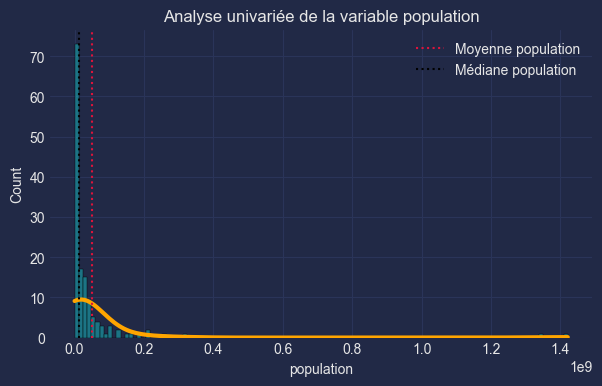

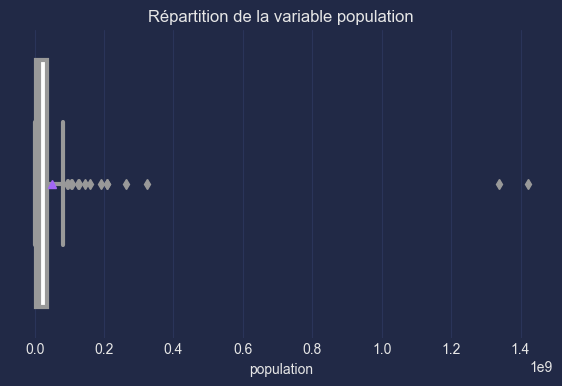



Analyse univariée pour la variable 'evolution_pop':
╒═══════════════╤═════════╤═════════╤═════════╤══════════╤═════════╤═════════╤═════════╤═════════╤══════════╤════════════╕
│               │   count │    mean │     std │      min │     25% │     50% │     75% │     max │     skew │   kurtosis │
╞═══════════════╪═════════╪═════════╪═════════╪══════════╪═════════╪═════════╪═════════╪═════════╪══════════╪════════════╡
│ evolution_pop │     141 │ 7.10998 │ 6.76308 │ -7.03048 │ 2.09959 │ 6.15101 │ 12.0209 │ 33.3873 │ 0.637342 │   0.654675 │
╘═══════════════╧═════════╧═════════╧═════════╧══════════╧═════════╧═════════╧═════════╧═════════╧══════════╧════════════╛


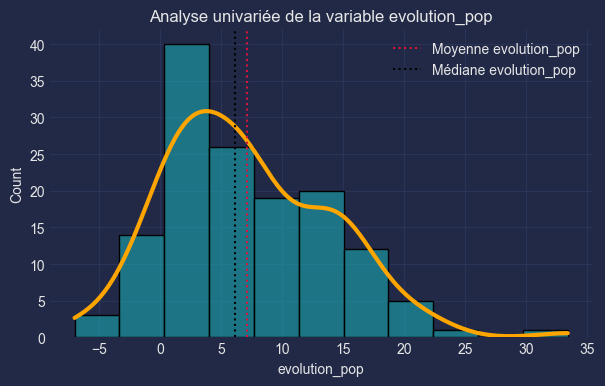

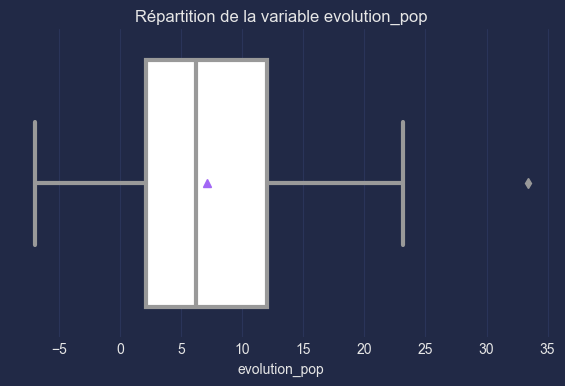



Analyse univariée pour la variable 'production':
╒════════════╤═════════╤════════╤═════════════╤═══════╤═════════╤════════╤════════╤═════════════╤═════════╤════════════╕
│            │   count │   mean │         std │   min │     25% │    50% │    75% │         max │    skew │   kurtosis │
╞════════════╪═════════╪════════╪═════════════╪═══════╪═════════╪════════╪════════╪═════════════╪═════════╪════════════╡
│ production │     141 │ 865509 │ 2.74834e+06 │   220 │ 27637.8 │ 128809 │ 628776 │ 2.19142e+07 │ 6.17023 │    40.7582 │
╘════════════╧═════════╧════════╧═════════════╧═══════╧═════════╧════════╧════════╧═════════════╧═════════╧════════════╛


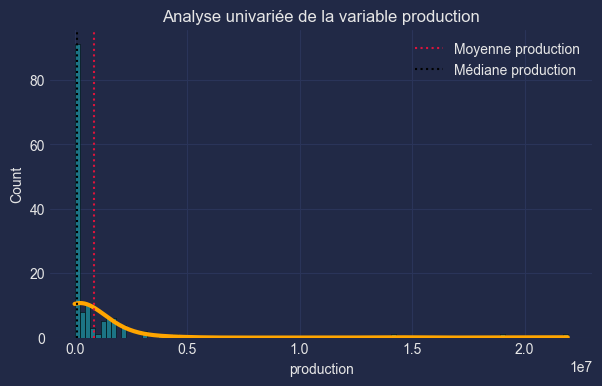

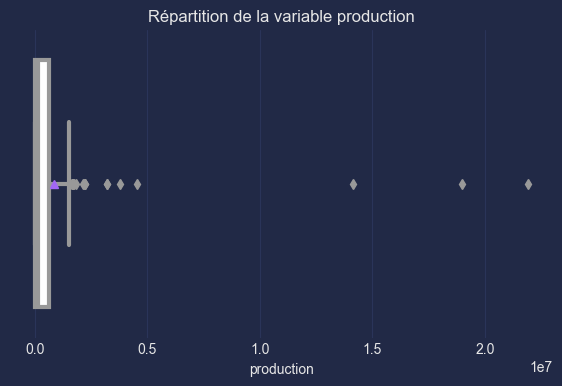



Analyse univariée pour la variable 'part_production':
╒═════════════════╤═════════╤═════════╤═════════╤═══════════╤═════════╤════════╤═════════╤═════════╤══════════╤════════════╕
│                 │   count │    mean │     std │       min │     25% │    50% │     75% │     max │     skew │   kurtosis │
╞═════════════════╪═════════╪═════════╪═════════╪═══════════╪═════════╪════════╪═════════╪═════════╪══════════╪════════════╡
│ part_production │     141 │ 36.6735 │ 22.9848 │ 0.0620127 │ 17.6663 │ 33.871 │ 50.9104 │ 95.2061 │ 0.556995 │  -0.347143 │
╘═════════════════╧═════════╧═════════╧═════════╧═══════════╧═════════╧════════╧═════════╧═════════╧══════════╧════════════╛


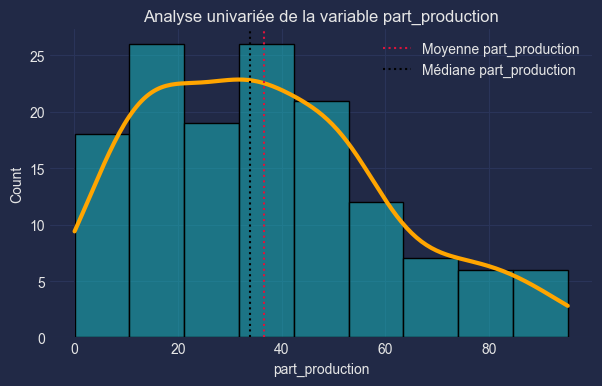

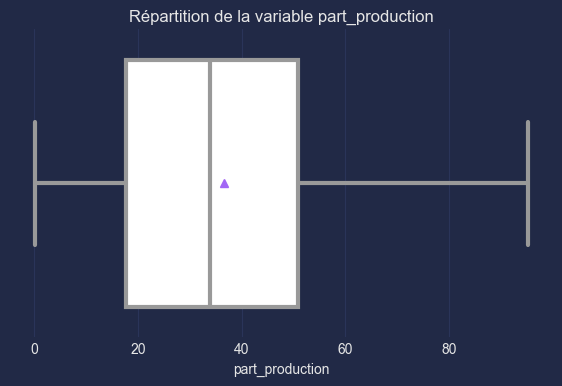



Analyse univariée pour la variable 'evolution_production':
╒══════════════════════╤═════════╤═════════╤═════════╤══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤════════════╕
│                      │   count │    mean │     std │      min │     25% │     50% │     75% │     max │    skew │   kurtosis │
╞══════════════════════╪═════════╪═════════╪═════════╪══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════════╡
│ evolution_production │     141 │ 21.0861 │ 39.4122 │ -60.4159 │ 5.99671 │ 15.0849 │ 26.6381 │ 391.792 │ 6.07769 │    55.9959 │
╘══════════════════════╧═════════╧═════════╧═════════╧══════════╧═════════╧═════════╧═════════╧═════════╧═════════╧════════════╛


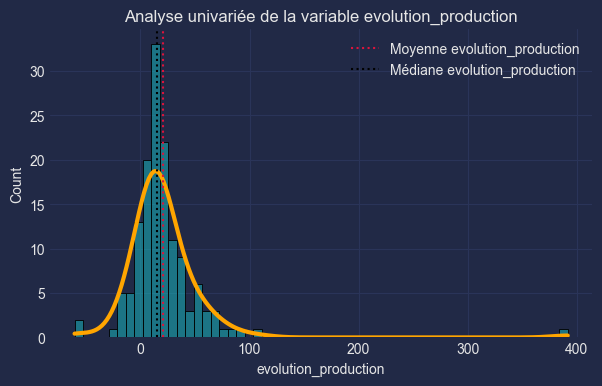

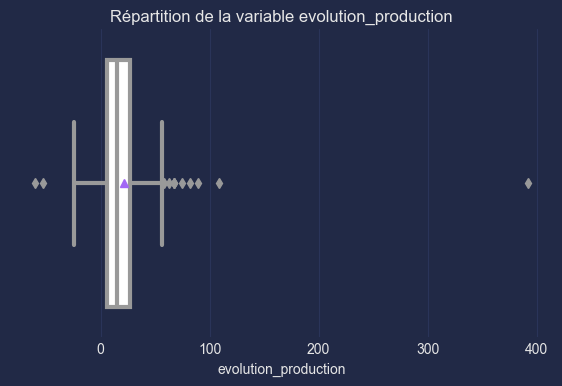



Analyse univariée pour la variable 'TDI':
╒═════╤═════════╤═════════╤═════════╤═══════╤═════════╤═════════╤═════════╤═════════╤═════════╤════════════╕
│     │   count │    mean │     std │   min │     25% │     50% │     75% │     max │    skew │   kurtosis │
╞═════╪═════════╪═════════╪═════════╪═══════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════════╡
│ TDI │     141 │ 39.1033 │ 48.5955 │     0 │ 3.93959 │ 20.6897 │ 68.7898 │ 323.929 │ 2.37465 │    9.01559 │
╘═════╧═════════╧═════════╧═════════╧═══════╧═════════╧═════════╧═════════╧═════════╧═════════╧════════════╛


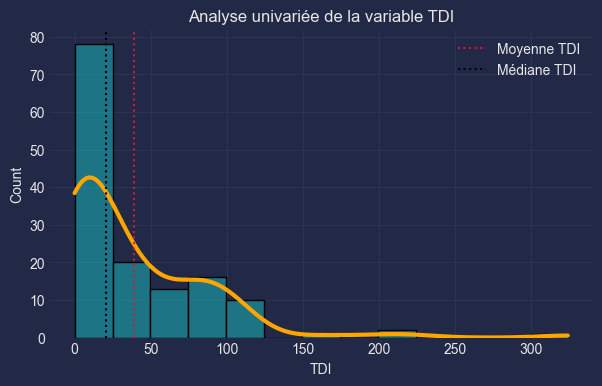

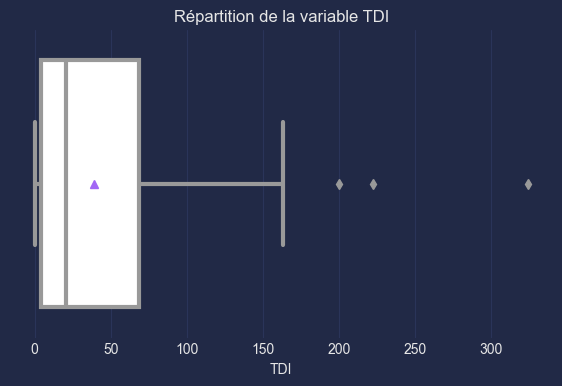



Analyse univariée pour la variable 'TAS':
╒═════╤═════════╤═════════╤═════════╤═══════╤═════════╤═════════╤═════════╤═════════╤═════════╤════════════╕
│     │   count │    mean │     std │   min │     25% │     50% │     75% │     max │    skew │   kurtosis │
╞═════╪═════════╪═════════╪═════════╪═══════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════════╡
│ TAS │     141 │ 84.9847 │ 47.8308 │     0 │ 68.1529 │ 92.3077 │ 100.413 │ 304.605 │ 1.07398 │    4.87122 │
╘═════╧═════════╧═════════╧═════════╧═══════╧═════════╧═════════╧═════════╧═════════╧═════════╧════════════╛


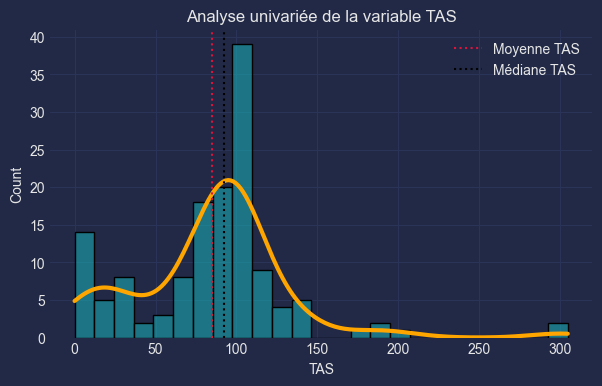

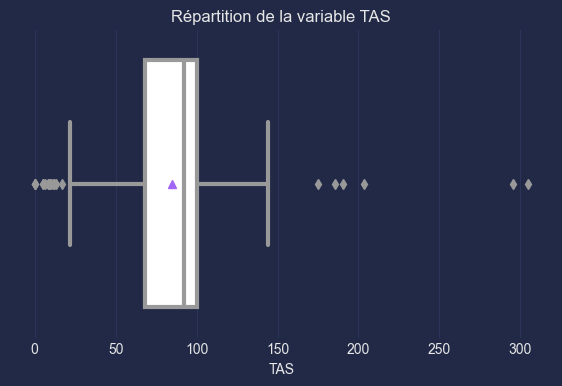



Analyse univariée pour la variable 'importation':
╒═════════════╤═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╤═════════╤════════════╕
│             │   count │    mean │     std │   min │   25% │   50% │   75% │   max │    skew │   kurtosis │
╞═════════════╪═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═════════╪════════════╡
│ importation │     141 │ 105.348 │ 201.268 │     0 │     3 │    24 │   110 │  1069 │ 2.97651 │    9.02331 │
╘═════════════╧═════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╧═════════╧════════════╛


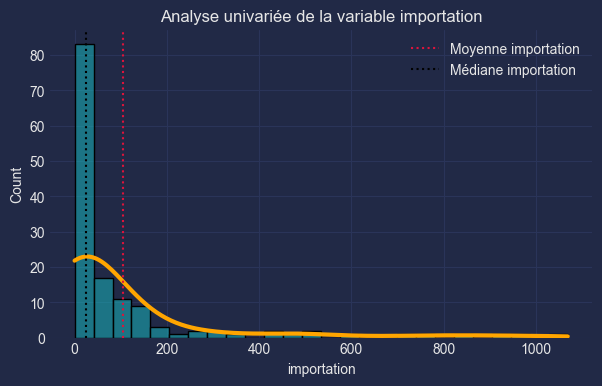

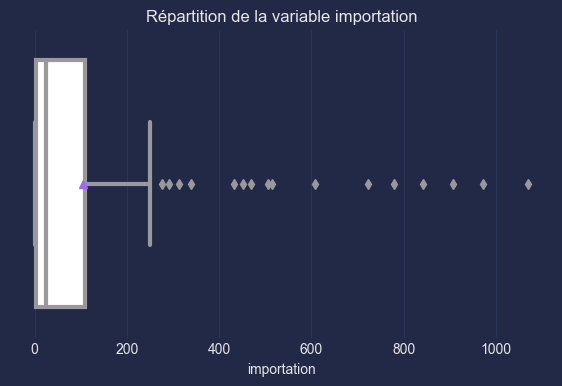



Analyse univariée pour la variable 'exportation':
╒═════════════╤═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╤═════════╤════════════╕
│             │   count │    mean │     std │   min │   25% │   50% │   75% │   max │    skew │   kurtosis │
╞═════════════╪═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═════════╪════════════╡
│ exportation │     141 │ 126.496 │ 503.383 │     0 │     0 │     1 │    29 │  4223 │ 6.68464 │    48.8613 │
╘═════════════╧═════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╧═════════╧════════════╛


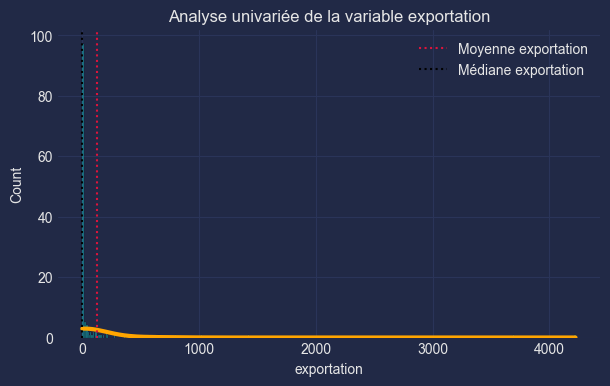

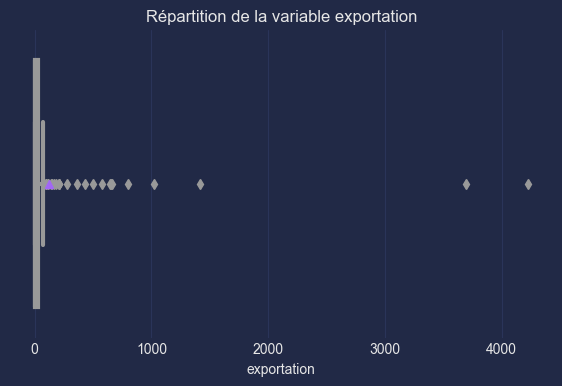



Analyse univariée pour la variable 'nourriture':
╒════════════╤═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╤═════════╤════════════╕
│            │   count │    mean │     std │   min │   25% │   50% │   75% │   max │    skew │   kurtosis │
╞════════════╪═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═════════╪════════════╡
│ nourriture │     141 │ 776.411 │ 2325.62 │     3 │    49 │   144 │   556 │ 18100 │ 6.19558 │    41.8393 │
╘════════════╧═════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╧═════════╧════════════╛


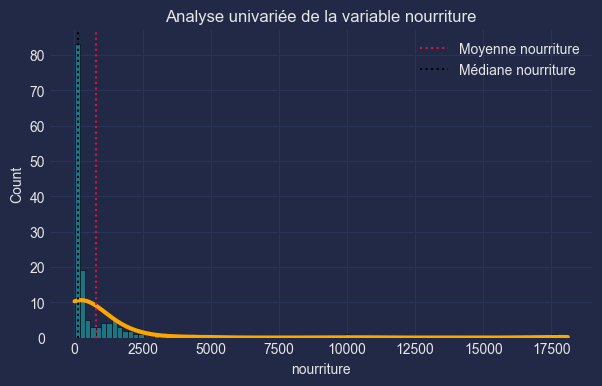

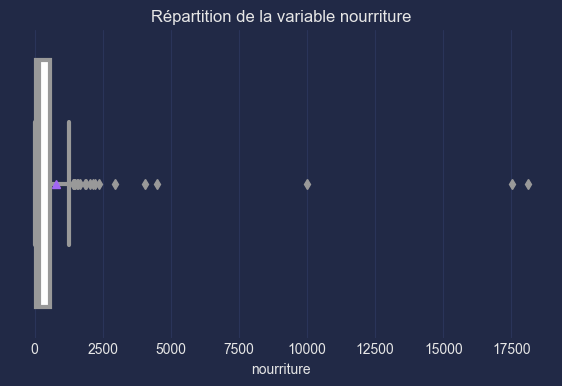



Analyse univariée pour la variable 'stabilite':
╒═══════════╤═════════╤════════════╤══════════╤══════════╤═══════════╤════════════╤════════╤═════════╤═══════════╤════════════╕
│           │   count │       mean │      std │      min │       25% │        50% │    75% │     max │      skew │   kurtosis │
╞═══════════╪═════════╪════════════╪══════════╪══════════╪═══════════╪════════════╪════════╪═════════╪═══════════╪════════════╡
│ stabilite │     141 │ -0.0994288 │ 0.910245 │ -2.94194 │ -0.673443 │ -0.0505645 │ 0.6282 │ 1.58723 │ -0.610898 │   0.272368 │
╘═══════════╧═════════╧════════════╧══════════╧══════════╧═══════════╧════════════╧════════╧═════════╧═══════════╧════════════╛


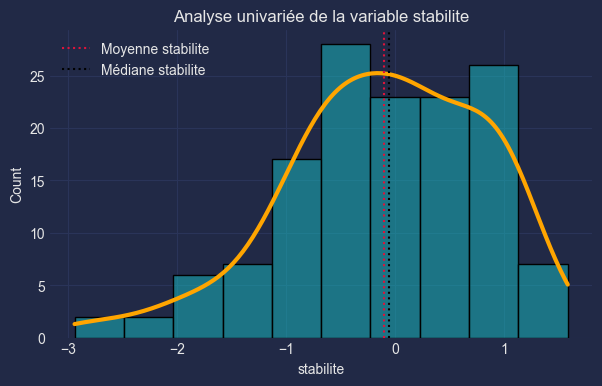

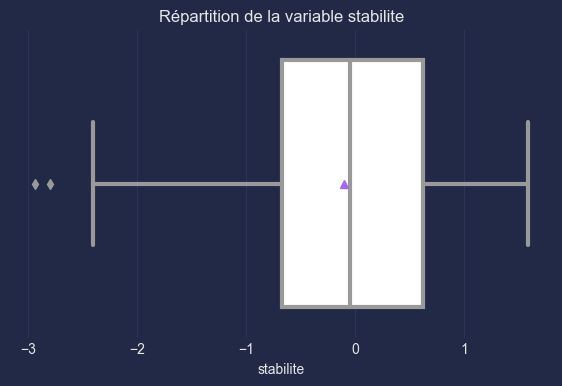



Analyse univariée pour la variable 'pib_hab':
╒═════════╤═════════╤═════════╤═════════╤═════════╤════════╤═════════╤═════════╤═════════╤════════╤════════════╕
│         │   count │    mean │     std │     min │    25% │     50% │     75% │     max │   skew │   kurtosis │
╞═════════╪═════════╪═════════╪═════════╪═════════╪════════╪═════════╪═════════╪═════════╪════════╪════════════╡
│ pib_hab │     141 │ 18563.9 │ 17329.4 │ 828.611 │ 4941.3 │ 12767.8 │ 26254.2 │ 84056.3 │ 1.3139 │    1.51611 │
╘═════════╧═════════╧═════════╧═════════╧═════════╧════════╧═════════╧═════════╧═════════╧════════╧════════════╛


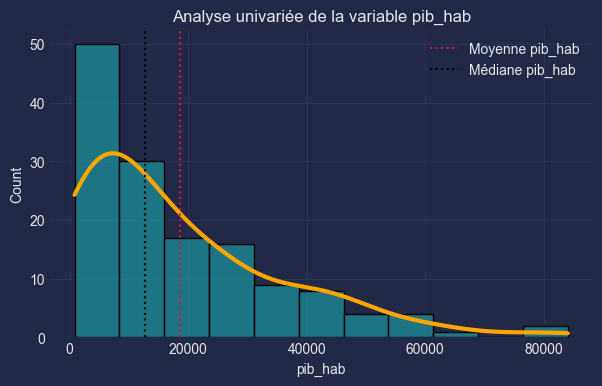

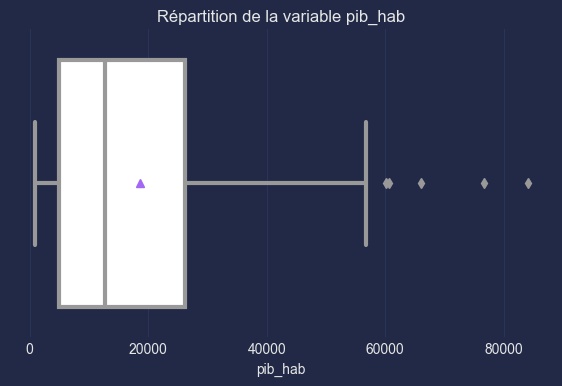



Analyse univariée pour la variable 'evolution_pib':
╒═══════════════╤═════════╤═════════╤═════════╤══════════╤═════════╤════════╤═════════╤═════════╤═══════════╤════════════╕
│               │   count │    mean │     std │      min │     25% │    50% │     75% │     max │      skew │   kurtosis │
╞═══════════════╪═════════╪═════════╪═════════╪══════════╪═════════╪════════╪═════════╪═════════╪═══════════╪════════════╡
│ evolution_pib │     141 │ 9.52658 │ 11.5531 │ -43.0482 │ 3.58587 │ 9.0866 │ 16.3036 │ 38.2389 │ -0.740407 │    3.47005 │
╘═══════════════╧═════════╧═════════╧═════════╧══════════╧═════════╧════════╧═════════╧═════════╧═══════════╧════════════╛


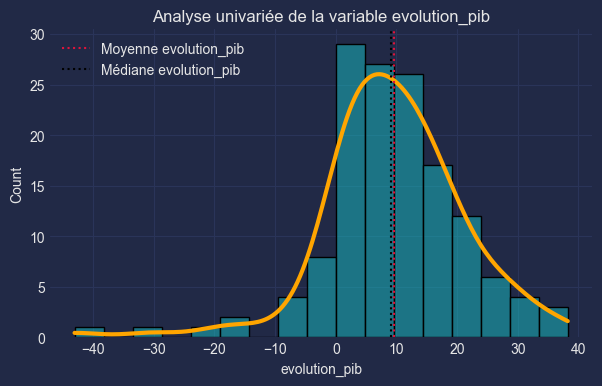

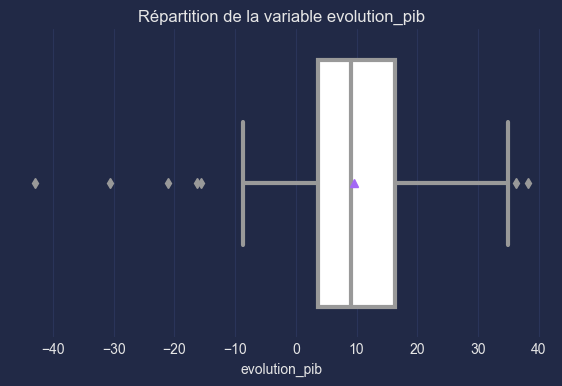



Analyse univariée pour la variable 'distance':
╒══════════╤═════════╤═════════╤═════════╤═══════╤═════════╤═════════╤═════════╤═════════╤══════════╤════════════╕
│          │   count │    mean │     std │   min │     25% │     50% │     75% │     max │     skew │   kurtosis │
╞══════════╪═════════╪═════════╪═════════╪═══════╪═════════╪═════════╪═════════╪═════════╪══════════╪════════════╡
│ distance │     141 │ 5459.56 │ 3453.26 │     0 │ 2298.45 │ 5234.38 │ 7995.39 │ 19179.4 │ 0.600609 │   0.555349 │
╘══════════╧═════════╧═════════╧═════════╧═══════╧═════════╧═════════╧═════════╧═════════╧══════════╧════════════╛


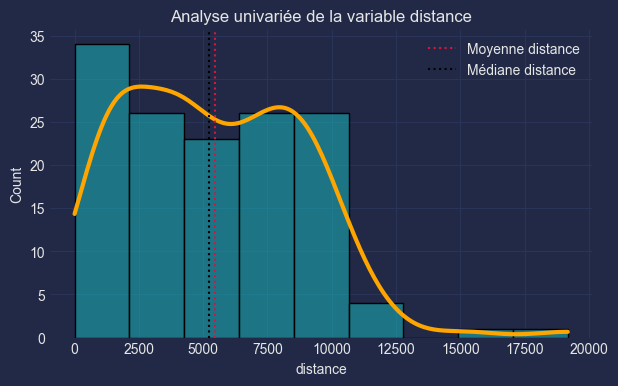

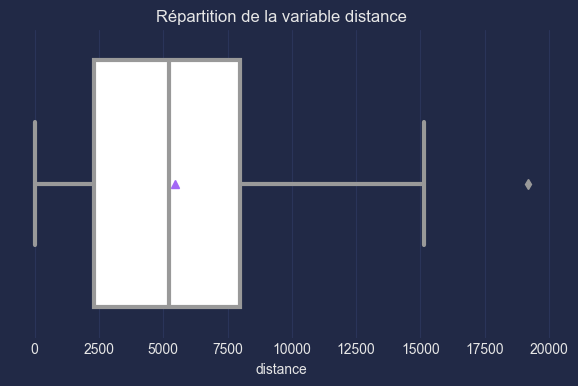

In [95]:
analyse_univariee(df_final_num)

In [96]:
detecter_valeurs_aberrantes(df_final_num)


Valeurs aberrantes pour la variable 'population' :
╒═══════════════════════╤══════════════╕
│ pays                  │   population │
╞═══════════════════════╪══════════════╡
│ Bangladesh            │  1.59685e+08 │
├───────────────────────┼──────────────┤
│ Brésil                │  2.07834e+08 │
├───────────────────────┼──────────────┤
│ Chine, continentale   │  1.42102e+09 │
├───────────────────────┼──────────────┤
│ Égypte                │  9.64426e+07 │
├───────────────────────┼──────────────┤
│ États-Unis d'Amérique │  3.25085e+08 │
├───────────────────────┼──────────────┤
│ Éthiopie              │  1.064e+08   │
├───────────────────────┼──────────────┤
│ Fédération de Russie  │  1.4553e+08  │
├───────────────────────┼──────────────┤
│ Inde                  │  1.33868e+09 │
├───────────────────────┼──────────────┤
│ Indonésie             │  2.64651e+08 │
├───────────────────────┼──────────────┤
│ Japon                 │  1.27503e+08 │
├───────────────────────┼──────────────┤
│ Mexi

In [97]:
df_final_num

,population,evolution_pop,production,part_production,evolution_production,TDI,TAS,importation,exportation,nourriture,stabilite,pib_hab,evolution_pib,distance
pays,,,,,,,,,,,,,,
Afghanistan,"36,296,113.00",16.48,"27,637.84",8.82,11.44,50.88,49.12,29.00,0.00,55.00,-2.80,"2,014.75",3.59,"5,572.98"
Afrique du Sud,"57,009,756.00",7.91,"1,665,323.50",53.17,11.35,24.27,78.71,514.00,63.00,"2,035.00",-0.28,"12,189.36",1.65,"8,789.48"
Albanie,"2,884,169.00",-1.03,"14,414.11",15.80,-9.91,80.85,27.66,38.00,0.00,47.00,0.38,"10,702.12",11.57,"1,545.67"
Algérie,"41,389,189.00",10.71,"260,460.86",33.52,-0.77,0.72,99.28,2.00,0.00,264.00,-0.92,"14,267.23",6.64,"2,023.64"
Allemagne,"82,658,409.00",2.08,"1,514,081.00",18.36,6.06,48.42,87.06,842.00,646.00,"1,609.00",0.59,"45,619.79",5.31,815.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),"29,402,484.00",0.14,"462,413.00",44.47,-53.00,3.99,95.85,25.00,0.00,596.00,-1.25,"12,879.14",-30.57,"7,869.35"
Viet Nam,"94,600,648.00",5.34,"910,151.75",23.14,45.30,24.13,76.12,291.00,1.00,"1,166.00",0.29,"6,422.09",28.85,"10,073.06"
Yémen,"27,834,819.00",13.74,"168,628.27",47.93,7.87,31.71,68.29,78.00,0.00,237.00,-2.94,"2,321.92",-43.05,"5,465.59"


In [98]:
# Exportation des données

df_final.to_csv("data/df_final.csv", index=True)
df_final_num.to_csv("data/df_final_num.csv", index=True)